# Konsep Informasi Mutual (Mutual Information)

Pada notebook ini, kita akan membahas konsep informasi mutual yang merupakan pengembangan dari konsep entropi dan sangat penting dalam analisis data dan machine learning.

## Apa itu Informasi Mutual?

Informasi mutual (MI) adalah ukuran ketergantungan antara dua variabel acak. MI mengukur seberapa banyak informasi yang dapat kita peroleh tentang satu variabel dengan mengetahui variabel lainnya.

## Rumus Dasar Informasi Mutual

Untuk dua variabel acak X dan Y:

\[ I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p(x,y) \log_2 \left(\frac{p(x,y)}{p(x)p(y)}\right) \]

Atau dapat juga ditulis dalam bentuk entropi:

\[ I(X;Y) = H(X) + H(Y) - H(X,Y) = H(X) - H(X|Y) = H(Y) - H(Y|X) \]

di mana:
- H(X) adalah entropi dari X
- H(Y) adalah entropi dari Y
- H(X,Y) adalah entropi gabungan
- H(X|Y) adalah entropi bersyarat

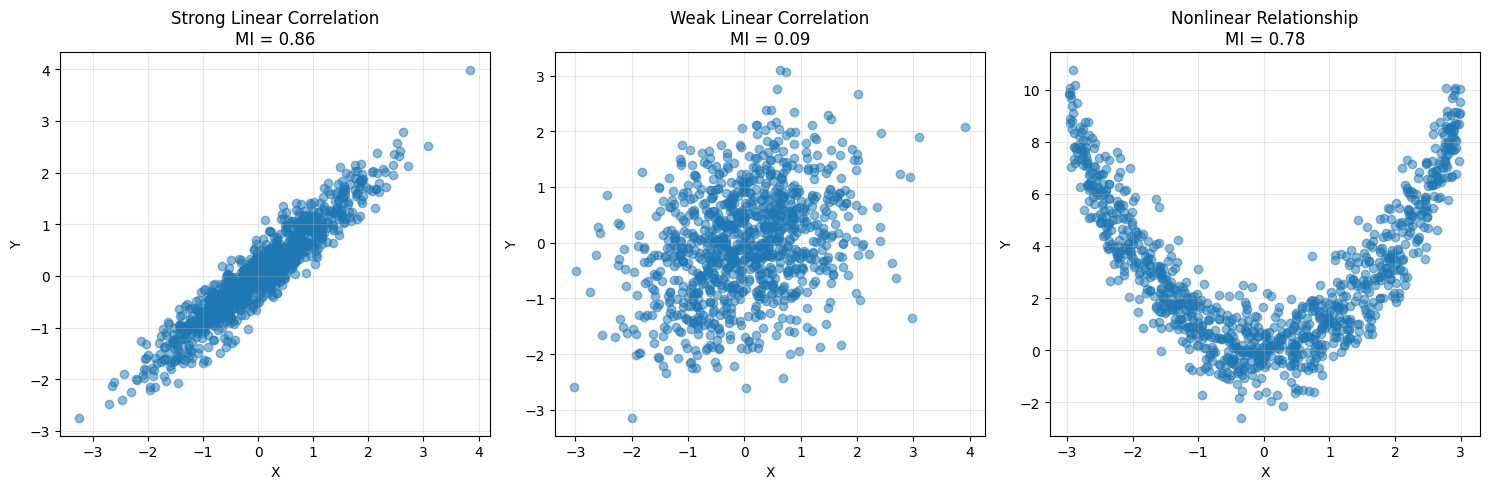

Mutual Information Values:
Strong Linear Correlation: 0.8608 bits
Weak Linear Correlation: 0.0888 bits
Nonlinear Relationship: 0.7811 bits


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
from scipy.stats import entropy

def calculate_mutual_information(x, y, bins=10):
    """
    Calculate mutual information between two continuous variables
    using binning approach
    """
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

# Generate data with different levels of dependency
np.random.seed(42)
n_samples = 1000

# Case 1: Strong positive correlation
x1 = np.random.normal(0, 1, n_samples)
y1 = x1 * 0.9 + np.random.normal(0, 0.3, n_samples)

# Case 2: Weak correlation
x2 = np.random.normal(0, 1, n_samples)
y2 = x2 * 0.3 + np.random.normal(0, 0.9, n_samples)

# Case 3: Nonlinear relationship
x3 = np.random.uniform(-3, 3, n_samples)
y3 = x3**2 + np.random.normal(0, 1, n_samples)

# Calculate mutual information for each case
mi1 = calculate_mutual_information(x1, y1)
mi2 = calculate_mutual_information(x2, y2)
mi3 = calculate_mutual_information(x3, y3)

# Visualization
plt.figure(figsize=(15, 5))

# Plot 1: Strong correlation
plt.subplot(131)
plt.scatter(x1, y1, alpha=0.5)
plt.title(f'Strong Linear Correlation\nMI = {mi1:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)

# Plot 2: Weak correlation
plt.subplot(132)
plt.scatter(x2, y2, alpha=0.5)
plt.title(f'Weak Linear Correlation\nMI = {mi2:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)

# Plot 3: Nonlinear relationship
plt.subplot(133)
plt.scatter(x3, y3, alpha=0.5)
plt.title(f'Nonlinear Relationship\nMI = {mi3:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print numerical results
print("Mutual Information Values:")
print(f"Strong Linear Correlation: {mi1:.4f} bits")
print(f"Weak Linear Correlation: {mi2:.4f} bits")
print(f"Nonlinear Relationship: {mi3:.4f} bits")

## Informasi Mutual dalam Feature Selection

Informasi mutual sering digunakan dalam feature selection karena:
1. Dapat menangkap hubungan non-linear
2. Tidak bergantung pada skala variabel
3. Memiliki interpretasi yang jelas

Mari kita lihat contoh penggunaan MI untuk feature selection:

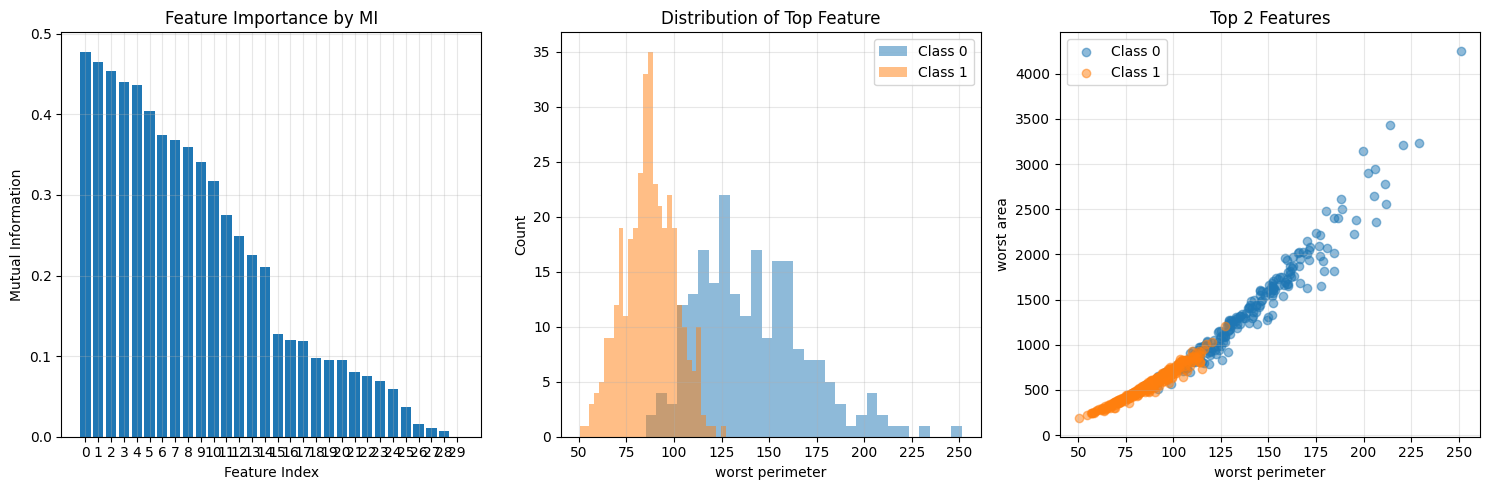

Top 10 Features by Mutual Information:
                 Feature  Mutual Information
22       worst perimeter            0.477838
23            worst area            0.464456
20          worst radius            0.453927
7    mean concave points            0.439695
27  worst concave points            0.436371
2         mean perimeter            0.403726
6         mean concavity            0.374916
0            mean radius            0.367816
3              mean area            0.359072
13            area error            0.340808


In [91]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Calculate mutual information for each feature
mi_scores = mutual_info_classif(X, y)

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Mutual Information': mi_scores
}).sort_values('Mutual Information', ascending=False)

# Visualization
plt.figure(figsize=(15, 5))

# Plot 1: Feature importance
plt.subplot(131)
plt.bar(range(len(mi_scores)), feature_importance['Mutual Information'])
plt.xticks(range(len(mi_scores)), range(len(mi_scores)))
plt.xlabel('Feature Index')
plt.ylabel('Mutual Information')
plt.title('Feature Importance by MI')
plt.grid(True, alpha=0.3)

# Plot 2: Top features distribution
top_feature_idx = feature_importance.index[0]
plt.subplot(132)
for label in [0, 1]:
    plt.hist(X[y==label, top_feature_idx], bins=30, alpha=0.5, 
            label=f'Class {label}')
plt.xlabel(feature_importance['Feature'].iloc[0])
plt.ylabel('Count')
plt.title('Distribution of Top Feature')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Scatter plot of top 2 features
plt.subplot(133)
top2_idx = feature_importance.index[:2]
plt.scatter(X[y==0, top2_idx[0]], X[y==0, top2_idx[1]], 
           alpha=0.5, label='Class 0')
plt.scatter(X[y==1, top2_idx[0]], X[y==1, top2_idx[1]], 
           alpha=0.5, label='Class 1')
plt.xlabel(feature_importance['Feature'].iloc[0])
plt.ylabel(feature_importance['Feature'].iloc[1])
plt.title('Top 2 Features')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print top features
print("Top 10 Features by Mutual Information:")
print(feature_importance.head(10).to_string())

## Informasi Mutual dan Korelasi

Informasi mutual memiliki beberapa keunggulan dibanding korelasi:
1. Dapat mendeteksi hubungan non-linear
2. Selalu non-negatif
3. Invariant terhadap transformasi monoton

Mari kita bandingkan MI dengan korelasi Pearson:

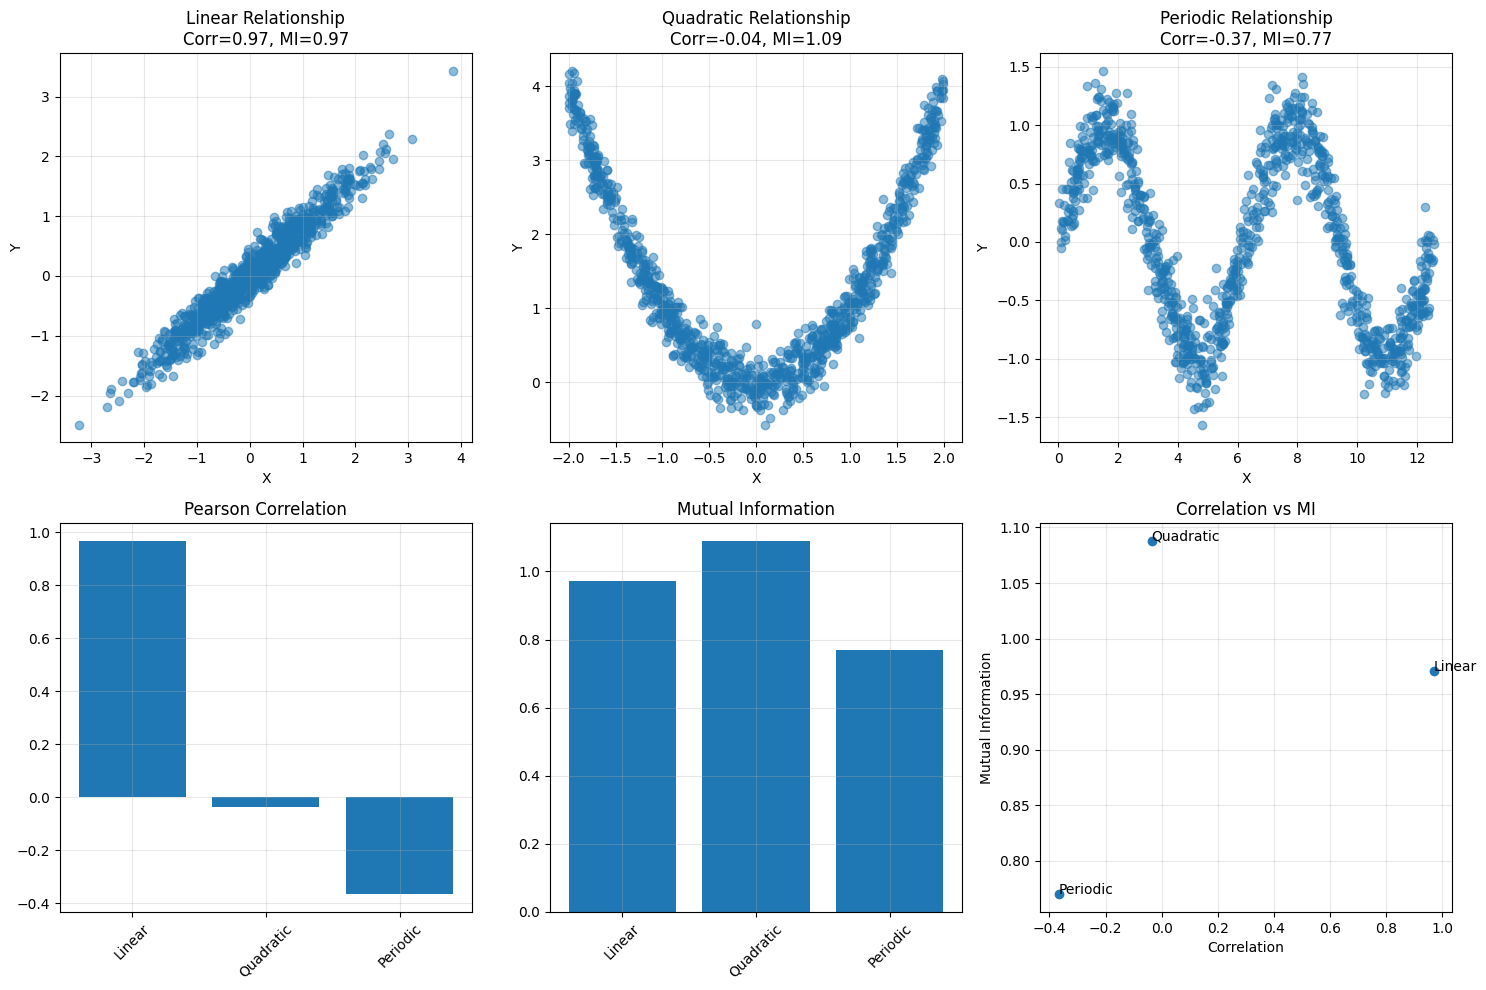

Comparison of Correlation and Mutual Information:

Linear Relationship:
Pearson Correlation: 0.9685
Mutual Information: 0.9710 bits

Quadratic Relationship:
Pearson Correlation: -0.0364
Mutual Information: 1.0882 bits

Periodic Relationship:
Pearson Correlation: -0.3668
Mutual Information: 0.7699 bits


In [93]:
# Generate different types of relationships
n_samples = 1000
np.random.seed(42)

# Linear relationship
x_linear = np.random.normal(0, 1, n_samples)
y_linear = 0.8 * x_linear + np.random.normal(0, 0.2, n_samples)

# Quadratic relationship
x_quad = np.random.uniform(-2, 2, n_samples)
y_quad = x_quad**2 + np.random.normal(0, 0.2, n_samples)

# Periodic relationship
x_periodic = np.random.uniform(0, 4*np.pi, n_samples)
y_periodic = np.sin(x_periodic) + np.random.normal(0, 0.2, n_samples)

# Calculate correlations and mutual information
relationships = {
    'Linear': (x_linear, y_linear),
    'Quadratic': (x_quad, y_quad),
    'Periodic': (x_periodic, y_periodic)
}

results = {}
for name, (x, y) in relationships.items():
    corr = np.corrcoef(x, y)[0,1]
    mi = calculate_mutual_information(x, y)
    results[name] = {'Correlation': corr, 'MI': mi}

# Visualization
plt.figure(figsize=(15, 10))

# Scatter plots
for i, (name, (x, y)) in enumerate(relationships.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(x, y, alpha=0.5)
    plt.title(f'{name} Relationship\nCorr={results[name]["Correlation"]:.2f}, MI={results[name]["MI"]:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, alpha=0.3)

# Bar plots
plt.subplot(2, 3, 4)
plt.bar(results.keys(), [r['Correlation'] for r in results.values()])
plt.title('Pearson Correlation')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
plt.bar(results.keys(), [r['MI'] for r in results.values()])
plt.title('Mutual Information')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add comparison plot
plt.subplot(2, 3, 6)
corrs = [r['Correlation'] for r in results.values()]
mis = [r['MI'] for r in results.values()]
plt.scatter(corrs, mis)
for name, corr, mi in zip(results.keys(), corrs, mis):
    plt.annotate(name, (corr, mi))
plt.xlabel('Correlation')
plt.ylabel('Mutual Information')
plt.title('Correlation vs MI')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print numerical results
print("Comparison of Correlation and Mutual Information:")
for name, metrics in results.items():
    print(f"\n{name} Relationship:")
    print(f"Pearson Correlation: {metrics['Correlation']:.4f}")
    print(f"Mutual Information: {metrics['MI']:.4f} bits")

## Kesimpulan

Dalam notebook ini, kita telah mempelajari:
1. Konsep dasar informasi mutual
2. Hubungan antara MI dan entropi
3. Penggunaan MI dalam feature selection
4. Perbandingan MI dengan korelasi Pearson

Poin-poin penting:
- MI mengukur ketergantungan umum antara variabel
- MI dapat mendeteksi hubungan non-linear
- MI sangat berguna dalam feature selection
- MI memiliki keunggulan dibanding korelasi dalam beberapa kasus

## Latihan

1. Implementasikan perhitungan MI dari awal (tanpa menggunakan sklearn)
2. Bandingkan performa feature selection menggunakan MI vs korelasi
3. Visualisasikan MI untuk berbagai jenis distribusi probabilitas
4. Analisis pengaruh noise terhadap MI
5. Implementasikan feature selection dengan MI untuk dataset real

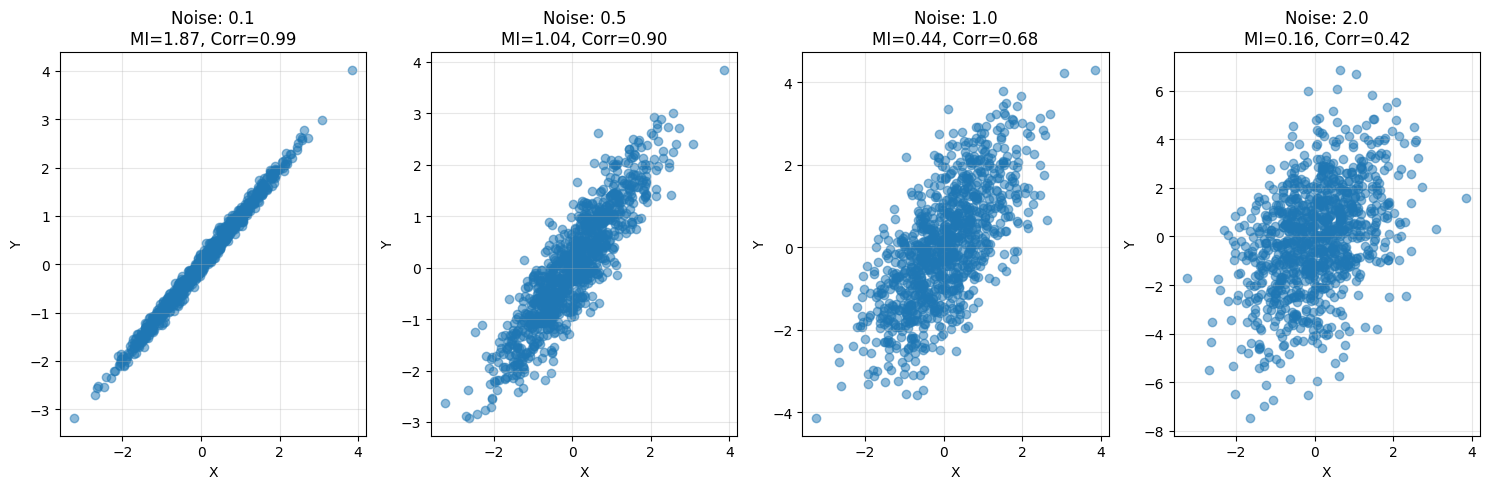

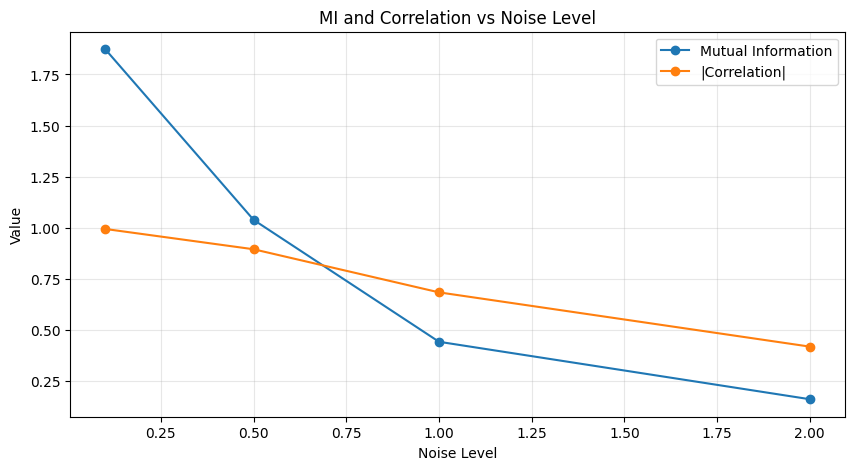


Effect of Noise on MI and Correlation:

Noise Level: 0.1
Mutual Information: 1.8735 bits
Correlation: 0.9948

Noise Level: 0.5
Mutual Information: 1.0394 bits
Correlation: 0.8957

Noise Level: 1.0
Mutual Information: 0.4434 bits
Correlation: 0.6850

Noise Level: 2.0
Mutual Information: 0.1626 bits
Correlation: 0.4197


In [96]:
# Latihan 1: Implementasi MI dari awal
def calculate_entropy_2d(x, y, bins=10):
    """Calculate joint entropy H(X,Y) and marginal entropies H(X), H(Y)"""
    # Calculate joint histogram
    hist_2d, x_edges, y_edges = np.histogram2d(x, y, bins=bins)
    
    # Normalize to get probabilities
    p_xy = hist_2d / float(np.sum(hist_2d))
    p_x = np.sum(p_xy, axis=1)  # marginal for x
    p_y = np.sum(p_xy, axis=0)  # marginal for y
    
    # Calculate entropies
    h_xy = -np.sum(p_xy[p_xy > 0] * np.log2(p_xy[p_xy > 0]))
    h_x = -np.sum(p_x[p_x > 0] * np.log2(p_x[p_x > 0]))
    h_y = -np.sum(p_y[p_y > 0] * np.log2(p_y[p_y > 0]))
    
    return h_xy, h_x, h_y

def mutual_information_2d(x, y, bins=10):
    """Calculate mutual information I(X;Y) = H(X) + H(Y) - H(X,Y)"""
    h_xy, h_x, h_y = calculate_entropy_2d(x, y, bins)
    mi = h_x + h_y - h_xy
    return mi

# Generate data with different noise levels
np.random.seed(42)
x = np.random.normal(0, 1, 1000)
noise_levels = [0.1, 0.5, 1.0, 2.0]
results = []

plt.figure(figsize=(15, 5))

for i, noise in enumerate(noise_levels):
    # Generate noisy relationship
    y = x + np.random.normal(0, noise, 1000)
    
    # Calculate MI and correlation
    mi = mutual_information_2d(x, y)
    corr = np.corrcoef(x, y)[0,1]
    
    results.append({
        'Noise': noise,
        'MI': mi,
        'Correlation': corr
    })
    
    # Plot
    plt.subplot(1, len(noise_levels), i+1)
    plt.scatter(x, y, alpha=0.5)
    plt.title(f'Noise: {noise}\nMI={mi:.2f}, Corr={corr:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot MI and correlation vs noise
plt.figure(figsize=(10, 5))

noise_levels = [r['Noise'] for r in results]
mis = [r['MI'] for r in results]
corrs = [r['Correlation'] for r in results]

plt.plot(noise_levels, mis, 'o-', label='Mutual Information')
plt.plot(noise_levels, np.abs(corrs), 'o-', label='|Correlation|')
plt.xlabel('Noise Level')
plt.ylabel('Value')
plt.title('MI and Correlation vs Noise Level')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print results
print("\nEffect of Noise on MI and Correlation:")
for result in results:
    print(f"\nNoise Level: {result['Noise']}")
    print(f"Mutual Information: {result['MI']:.4f} bits")
    print(f"Correlation: {result['Correlation']:.4f}")